In [1]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673243,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373797,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439531,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293462,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068588,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [2]:
all_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Ticker'],
      dtype='object')

In [3]:
unique_tickers = all_data['Ticker'].unique()
print(unique_tickers)

['INTC' 'AMD' 'NVDA' 'SOXX']


In [4]:
import yfinance as yf

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

nvda_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,923.000000,926.479980,904.049988,914.349976,914.349976,48037200
2024-03-22,911.409973,947.780029,908.340027,942.890015,942.890015,58521500
2024-03-25,939.409973,967.659973,935.099976,950.020020,950.020020,55213600
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58436500


[*********************100%%**********************]  1 of 1 completed


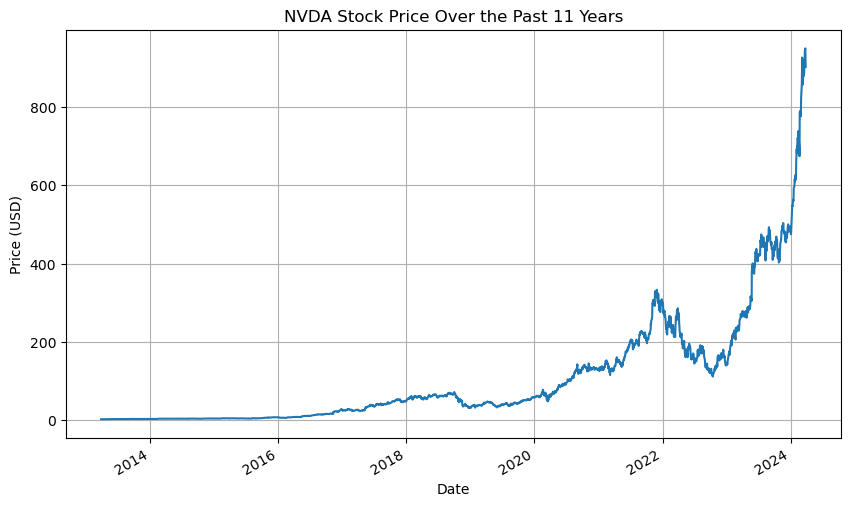

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
nvda_data['Close'].plot()
plt.title('NVDA Stock Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [6]:
# Filter the data for NVDA
nvda_data = all_data[all_data['Ticker'] == 'NVDA']

# Prophet expects the 'Date' and 'Close' columns
nvda_data = nvda_data[['Date', 'Close']]
nvda_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(nvda_data)

# Make a future dataframe for one year past the last available date
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Print the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

21:17:18 - cmdstanpy - INFO - Chain [1] start processing
21:17:19 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,211.467259,177.506428,245.786761
2878,2024-03-24,211.541669,173.734391,247.008124
2879,2024-03-25,211.906787,173.390475,244.289706
2880,2024-03-26,211.724907,174.736417,244.383972
2881,2024-03-27,211.521910,176.553845,246.348982


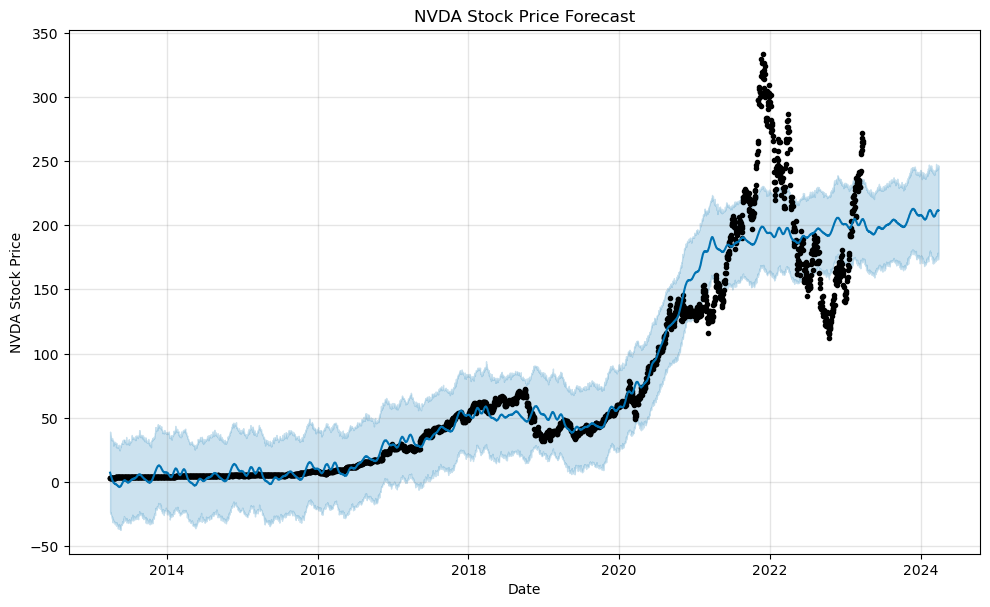

In [7]:
import matplotlib.pyplot as plt

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('NVDA Stock Price')
plt.title('NVDA Stock Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


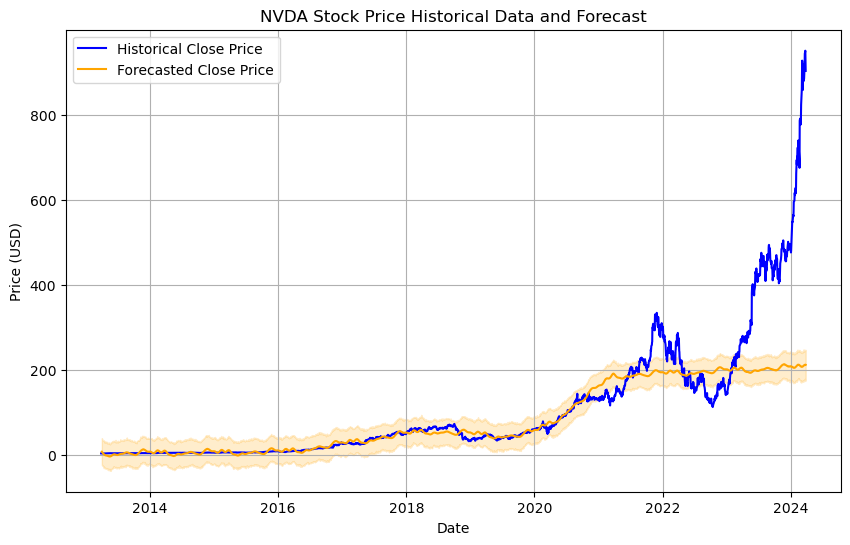

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt

# Ticker symbol for NVDA
nvda_symbol = 'NVDA'

# Fetch NVDA stock data for the past 11 years
nvda_data = yf.download(nvda_symbol, period='11y')

# Assume 'model' and 'forecast' are already defined
# Replace this assumption with your actual Prophet model and forecast

# Plot both historical data and forecast
plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(nvda_data.index, nvda_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

plt.title('NVDA Stock Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Calculate the percentage change of daily returns for Nvidia
daily_returns_nvidia = nvda_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_nvidia = daily_returns_nvidia.dropna()

# Convert the series of daily returns into a DataFrame for Nvidia
daily_returns_df_nvidia = pd.DataFrame({'Daily_Returns_Nvidia': daily_returns_nvidia})

# Display the DataFrame for Nvidia
daily_returns_df_nvidia

,Daily_Returns_Nvidia
Date,
2013-04-01,-0.032736
2013-04-02,-0.010475
2013-04-03,-0.012215
2013-04-04,0.009893
2013-04-05,0.017142
...,...
2024-03-21,0.011762
2024-03-22,0.031213
2024-03-25,0.007562


In [10]:
# Reset the index of the DataFrame for Nvidia
daily_returns_df_nvidia = daily_returns_df_nvidia.reset_index()

# Display the DataFrame for Nvidia with reset index
daily_returns_df_nvidia


,Date,Daily_Returns_Nvidia
0,2013-04-01,-0.032736
1,2013-04-02,-0.010475
2,2013-04-03,-0.012215
3,2013-04-04,0.009893
4,2013-04-05,0.017142
...,...,...
2763,2024-03-21,0.011762
2764,2024-03-22,0.031213
2765,2024-03-25,0.007562
2766,2024-03-26,-0.025694


In [12]:
# Save the DataFrame to a CSV file
daily_returns_df_nvidia.to_csv('daily_returns_nvidia.csv', index=False)

In [13]:
daily_returns_df_nvidia.columns

Index(['Date', 'Daily_Returns_Nvidia'], dtype='object')

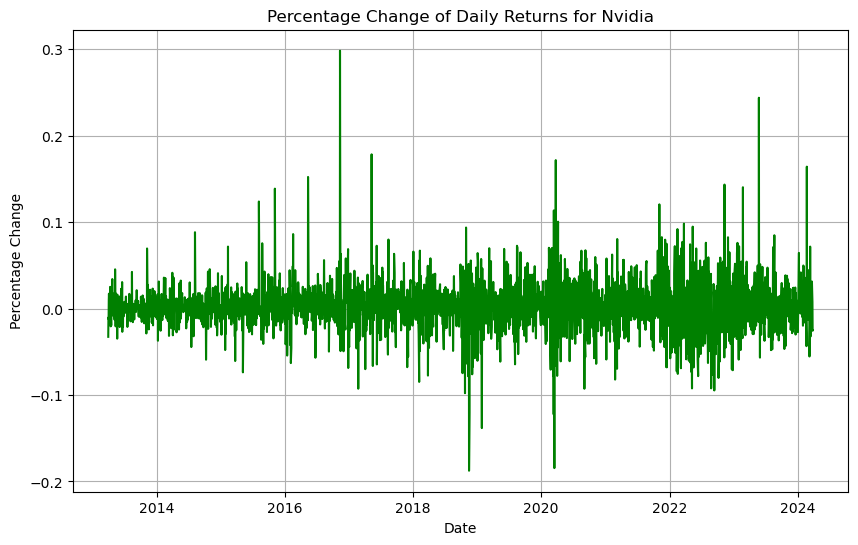

In [14]:
import matplotlib.pyplot as plt

# Calculate the percentage change of daily returns for Nvidia
daily_returns_nvda = nvda_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns_nvda = daily_returns_nvda.dropna()

# Plot the percentage change of daily returns for Nvidia
plt.figure(figsize=(10, 6))
plt.plot(daily_returns_nvda.index, daily_returns_nvda.values, color='green')
plt.title('Percentage Change of Daily Returns for Nvidia')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

In [23]:
daily_returns_nvda = daily_returns_nvda.to_frame().reset_index()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features

# Rename columns as required by tsfresh
daily_returns_nvda.columns = ['time', 'value']

# Extract features using tsfresh
extracted_features = extract_features(daily_returns_nvda, column_id='time')

# Display the extracted features
extracted_features

Feature Extraction: 100%|██████████| 20/20 [00:45<00:00,  2.26s/it]


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
2013-04-01,0.0,0.0,0.0,0.0,-0.032736,0.001072,NaN,NaN,NaN,-0.032736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,0.0,0.0,0.0,0.0,-0.010475,0.000110,NaN,NaN,NaN,-0.010475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03,0.0,0.0,0.0,0.0,-0.012215,0.000149,NaN,NaN,NaN,-0.012215,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04,0.0,0.0,0.0,0.0,0.009893,0.000098,NaN,NaN,NaN,0.009893,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,0.0,0.0,0.0,0.0,0.017142,0.000294,NaN,NaN,NaN,0.017142,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.0,0.0,0.0,0.0,0.011762,0.000138,NaN,NaN,NaN,0.011762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-22,0.0,0.0,0.0,0.0,0.031213,0.000974,NaN,NaN,NaN,0.031213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-25,0.0,0.0,0.0,0.0,0.007562,0.000057,NaN,NaN,NaN,0.007562,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-26,0.0,0.0,0.0,0.0,-0.025694,0.000660,NaN,NaN,NaN,-0.025694,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
extracted_features.columns

Index(['value__variance_larger_than_standard_deviation',
       'value__has_duplicate_max', 'value__has_duplicate_min',
       'value__has_duplicate', 'value__sum_values', 'value__abs_energy',
       'value__mean_abs_change', 'value__mean_change',
       'value__mean_second_derivative_central', 'value__median',
       ...
       'value__fourier_entropy__bins_5', 'value__fourier_entropy__bins_10',
       'value__fourier_entropy__bins_100',
       'value__permutation_entropy__dimension_3__tau_1',
       'value__permutation_entropy__dimension_4__tau_1',
       'value__permutation_entropy__dimension_5__tau_1',
       'value__permutation_entropy__dimension_6__tau_1',
       'value__permutation_entropy__dimension_7__tau_1',
       'value__query_similarity_count__query_None__threshold_0.0',
       'value__mean_n_absolute_max__number_of_maxima_7'],
      dtype='object', length=783)

In [26]:
# Remove columns with NaN values
relevant_features_cleaned = extracted_features.dropna(axis=1)

# Select columns with non-zero values
relevant_features_cleaned = relevant_features_cleaned.loc[:, (relevant_features_cleaned != 0).any(axis=0)]

# Display the cleaned relevant features
print(relevant_features_cleaned)

            value__sum_values  value__abs_energy  value__median  value__mean  \
2013-04-01          -0.032736           0.001072      -0.032736    -0.032736   
2013-04-02          -0.010475           0.000110      -0.010475    -0.010475   
2013-04-03          -0.012215           0.000149      -0.012215    -0.012215   
2013-04-04           0.009893           0.000098       0.009893     0.009893   
2013-04-05           0.017142           0.000294       0.017142     0.017142   
...                       ...                ...            ...          ...   
2024-03-21           0.011762           0.000138       0.011762     0.011762   
2024-03-22           0.031213           0.000974       0.031213     0.031213   
2024-03-25           0.007562           0.000057       0.007562     0.007562   
2024-03-26          -0.025694           0.000660      -0.025694    -0.025694   
2024-03-27          -0.024967           0.000623      -0.024967    -0.024967   

            value__length  value__root_

In [27]:
relevant_features_cleaned

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,...,value__range_count__max_1__min_-1,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100
2013-04-01,-0.032736,0.001072,-0.032736,-0.032736,1.0,0.032736,1.0,1.0,1.0,-0.032736,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-02,-0.010475,0.000110,-0.010475,-0.010475,1.0,0.010475,1.0,1.0,1.0,-0.010475,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-03,-0.012215,0.000149,-0.012215,-0.012215,1.0,0.012215,1.0,1.0,1.0,-0.012215,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-04,0.009893,0.000098,0.009893,0.009893,1.0,0.009893,1.0,1.0,1.0,0.009893,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2013-04-05,0.017142,0.000294,0.017142,0.017142,1.0,0.017142,1.0,1.0,1.0,0.017142,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.011762,0.000138,0.011762,0.011762,1.0,0.011762,1.0,1.0,1.0,0.011762,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2024-03-22,0.031213,0.000974,0.031213,0.031213,1.0,0.031213,1.0,1.0,1.0,0.031213,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2024-03-25,0.007562,0.000057,0.007562,0.007562,1.0,0.007562,1.0,1.0,1.0,0.007562,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2024-03-26,-0.025694,0.000660,-0.025694,-0.025694,1.0,0.025694,1.0,1.0,1.0,-0.025694,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [28]:
relevant_features_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
value__sum_values,2768.0,0.002467,0.028500,-0.187559,-0.010954,0.002143,0.015615,0.298068
value__abs_energy,2768.0,0.000818,0.002877,0.000000,0.000035,0.000178,0.000662,0.088844
value__median,2768.0,0.002467,0.028500,-0.187559,-0.010954,0.002143,0.015615,0.298068
value__mean,2768.0,0.002467,0.028500,-0.187559,-0.010954,0.002143,0.015615,0.298068
value__length,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__root_mean_square,2768.0,0.019455,0.020969,0.000000,0.005913,0.013331,0.025722,0.298068
value__last_location_of_maximum,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__last_location_of_minimum,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__ratio_value_number_to_time_series_length,2768.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
value__maximum,2768.0,0.002467,0.028500,-0.187559,-0.010954,0.002143,0.015615,0.298068


In [ ]:
relevant_features_cleaned.columns

Index(['value__sum_values', 'value__abs_energy', 'value__median',
       'value__mean', 'value__length', 'value__root_mean_square',
       'value__last_location_of_maximum', 'value__last_location_of_minimum',
       'value__ratio_value_number_to_time_series_length', 'value__maximum',
       'value__absolute_maximum', 'value__minimum', 'value__quantile__q_0.1',
       'value__quantile__q_0.2', 'value__quantile__q_0.3',
       'value__quantile__q_0.4', 'value__quantile__q_0.6',
       'value__quantile__q_0.7', 'value__quantile__q_0.8',
       'value__quantile__q_0.9',
       'value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'value__fft_coefficient__attr_"real"__coeff_0',
       'value__fft_coefficient__attr_"abs"__coeff_0',
       'value__fft_coefficient__

In [ ]:
daily_returns_nvda.head()

,time,value
0,2013-04-01,-0.032736
1,2013-04-02,-0.010475
2,2013-04-03,-0.012215
3,2013-04-04,0.009893
4,2013-04-05,0.017143


In [41]:
# pd.concat[]

# final_df= pd.concat([extracted_features_df, df['value'])

# final_df= pd.concat([relevant_features_cleaned, daily_returns_nvda['value'].reset_index()], axis = 1)

final_df = relevant_features_cleaned

final_df['Returns'] = daily_returns_nvda['value'].values

final_df.head()

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,...,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2013-04-01,-0.032736,0.001072,-0.032736,-0.032736,1.0,0.032736,1.0,1.0,1.0,-0.032736,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.032736
2013-04-02,-0.010475,0.000110,-0.010475,-0.010475,1.0,0.010475,1.0,1.0,1.0,-0.010475,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.010475
2013-04-03,-0.012215,0.000149,-0.012215,-0.012215,1.0,0.012215,1.0,1.0,1.0,-0.012215,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.012215
2013-04-04,0.009893,0.000098,0.009893,0.009893,1.0,0.009893,1.0,1.0,1.0,0.009893,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.009893
2013-04-05,0.017142,0.000294,0.017142,0.017142,1.0,0.017142,1.0,1.0,1.0,0.017142,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.017142


In [42]:
final_df['Returns'] = final_df['Returns'].shift(-1)

final_df

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,...,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2013-04-01,-0.032736,0.001072,-0.032736,-0.032736,1.0,0.032736,1.0,1.0,1.0,-0.032736,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.010475
2013-04-02,-0.010475,0.000110,-0.010475,-0.010475,1.0,0.010475,1.0,1.0,1.0,-0.010475,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.012215
2013-04-03,-0.012215,0.000149,-0.012215,-0.012215,1.0,0.012215,1.0,1.0,1.0,-0.012215,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.009893
2013-04-04,0.009893,0.000098,0.009893,0.009893,1.0,0.009893,1.0,1.0,1.0,0.009893,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.017142
2013-04-05,0.017142,0.000294,0.017142,0.017142,1.0,0.017142,1.0,1.0,1.0,0.017142,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.002407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.011762,0.000138,0.011762,0.011762,1.0,0.011762,1.0,1.0,1.0,0.011762,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.031213
2024-03-22,0.031213,0.000974,0.031213,0.031213,1.0,0.031213,1.0,1.0,1.0,0.031213,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.007562
2024-03-25,0.007562,0.000057,0.007562,0.007562,1.0,0.007562,1.0,1.0,1.0,0.007562,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.025694
2024-03-26,-0.025694,0.000660,-0.025694,-0.025694,1.0,0.025694,1.0,1.0,1.0,-0.025694,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.024967


In [43]:
final_df = final_df.dropna(subset='Returns')

In [44]:
final_df.tail()

,value__sum_values,value__abs_energy,value__median,value__mean,value__length,value__root_mean_square,value__last_location_of_maximum,value__last_location_of_minimum,value__ratio_value_number_to_time_series_length,value__maximum,...,value__range_count__max_0__min_-1000000000000.0,value__range_count__max_1000000000000.0__min_0,value__count_above__t_0,value__count_below__t_0,value__lempel_ziv_complexity__bins_2,value__lempel_ziv_complexity__bins_3,value__lempel_ziv_complexity__bins_5,value__lempel_ziv_complexity__bins_10,value__lempel_ziv_complexity__bins_100,Returns
2024-03-20,0.010895,0.000119,0.010895,0.010895,1.0,0.010895,1.0,1.0,1.0,0.010895,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.011762
2024-03-21,0.011762,0.000138,0.011762,0.011762,1.0,0.011762,1.0,1.0,1.0,0.011762,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.031213
2024-03-22,0.031213,0.000974,0.031213,0.031213,1.0,0.031213,1.0,1.0,1.0,0.031213,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.007562
2024-03-25,0.007562,0.000057,0.007562,0.007562,1.0,0.007562,1.0,1.0,1.0,0.007562,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.025694
2024-03-26,-0.025694,0.000660,-0.025694,-0.025694,1.0,0.025694,1.0,1.0,1.0,-0.025694,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.024967


In [45]:
# Select target variable (y)
target_variable = daily_returns_nvda['value']  # Replace 'your_target_column_name' with the actual column name

# Split data into features (X) and target variable (y)
X = final_df.drop(columns='Returns')
y = final_df['Returns']

# Display the shapes of X and y to ensure alignment
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2767, 38)
Shape of y: (2767,)


In [46]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2213, 38)
Shape of y_train: (2213,)
Shape of X_test: (554, 38)
Shape of y_test: (554,)


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE) 
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.024450797581365723


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)**0.5
print("Mean Squared Error:", mse)

# TIme series data needs to be split chronologically (no train split randomly)

Mean Absolute Error: 0.024450797581365723
Mean Squared Error: 0.03348960747161959


In [50]:
# Calculate the score (R-squared) of the model on the testing data
score = model.score(X_test, y_test)
print("R-squared Score:", score)

R-squared Score: -0.45146182343290553


19:10:27 - cmdstanpy - INFO - Chain [1] start processing
19:10:28 - cmdstanpy - INFO - Chain [1] done processing


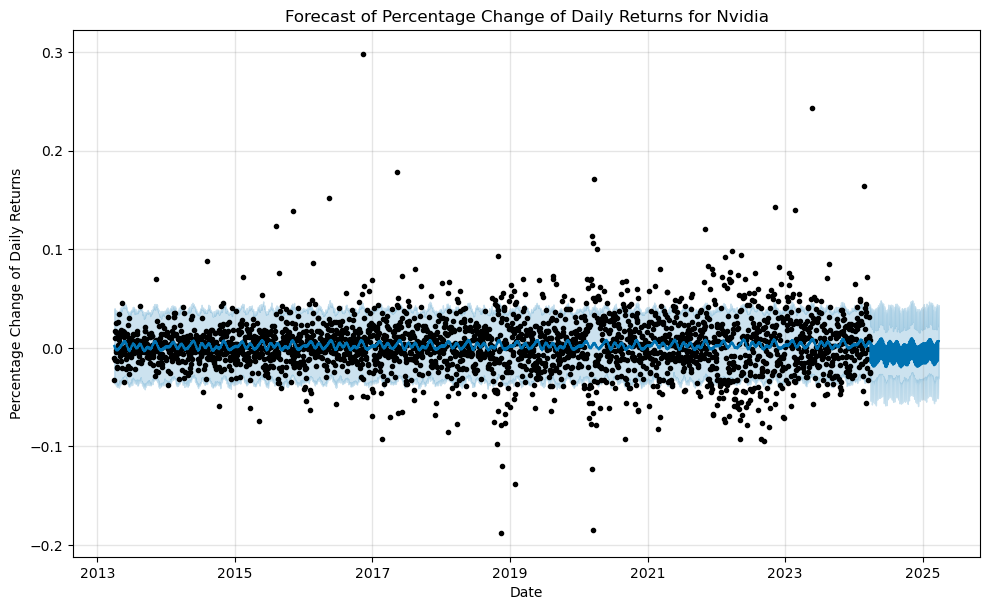

In [ ]:
from prophet import Prophet

# Prepare the DataFrame for Prophet
prophet_df_nvidia = daily_returns_df_nvidia.rename(columns={'Date': 'ds', 'Daily_Returns_Nvidia': 'y'})

# Initialize and fit the Prophet model
model_nvidia = Prophet()
model_nvidia.fit(prophet_df_nvidia)

# Make future dataframe for prediction for one year (365 days)
future_nvidia = model_nvidia.make_future_dataframe(periods=365)

# Forecast
forecast_nvidia = model_nvidia.predict(future_nvidia)

# Plot the forecast
model_nvidia.plot(forecast_nvidia, xlabel='Date', ylabel='Percentage Change of Daily Returns', figsize=(10, 6))
plt.title('Forecast of Percentage Change of Daily Returns for Nvidia')
plt.show()

In [ ]:
# Extract the forecasted values for the next one year
forecast_one_year = forecast_nvidia[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)

# Display the DataFrame
forecast_one_year

,ds,yhat,yhat_lower,yhat_upper
2768,2024-03-28,0.005998,-0.028720,0.041500
2769,2024-03-29,0.004093,-0.030853,0.039925
2770,2024-03-30,-0.014975,-0.053768,0.023309
2771,2024-03-31,-0.015306,-0.052632,0.021343
2772,2024-04-01,0.004530,-0.033292,0.040358
...,...,...,...,...
3128,2025-03-23,-0.013215,-0.046221,0.025714
3129,2025-03-24,0.006957,-0.031002,0.041941
3130,2025-03-25,0.007011,-0.029239,0.042802
3131,2025-03-26,0.006275,-0.030781,0.042140
